# Notebook 2: Exploratory Data Analysis & Feature Selection

## Objectives
* Explore the heart disease dataset to identify patterns and relationships between features and the target variable.
* Determine the top features to feed into machine learning models.

## Inputs
* `outputs/datasets/collection/heart_disease_raw.csv` (from Notebook 1)
#
## Outputs
* Insights and visualizations to guide feature selection.
* List of top candidate variables for modeling.
* Optional figures saved to `outputs/figures`.

---

## 1. Load Raw Dataset
We first load the raw dataset to confirm we are working with the correct data.

In [1]:
import pandas as pd
df = pd.read_csv("/workspaces/Heart_disease_risk_predictor/inputs/datasets/raw/heart_disease_uci.csv")

print("Dataset loaded successfully! First 5 rows of dataset:")
display(df.head())

Dataset loaded successfully! First 5 rows of dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---

## 2. Target Variable Distribution
Visualizing the distribution of the target variable `num` helps understand class balance.
In this dataset, `num` indicates:

- 0: No heart disease
  
- 1, 2, 3, 4: Increasing stages of heart disease

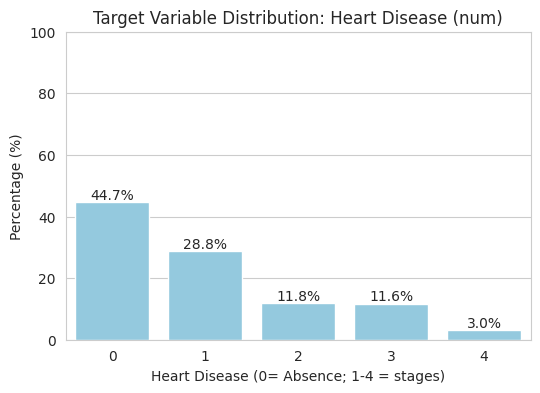

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

target_percent = df["num"].value_counts(normalize=True) * 100
target_labels = target_percent.index

plt.figure(figsize=(6,4))
sns.barplot(x=target_labels, y=target_percent.values, color="skyblue")
plt.title("Target Variable Distribution: Heart Disease (num)")
plt.xlabel("Heart Disease (0= Absence; 1-4 = stages)")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

for i, pct in enumerate(target_percent.values):
    plt.text(i, pct + 1, f'{pct:.1f}%', ha='center')
plt.show()

---

## 3. Numerical Features Overview
Quick distribution plots for all numerical variables to identify skewness, spread, and possible outliers.


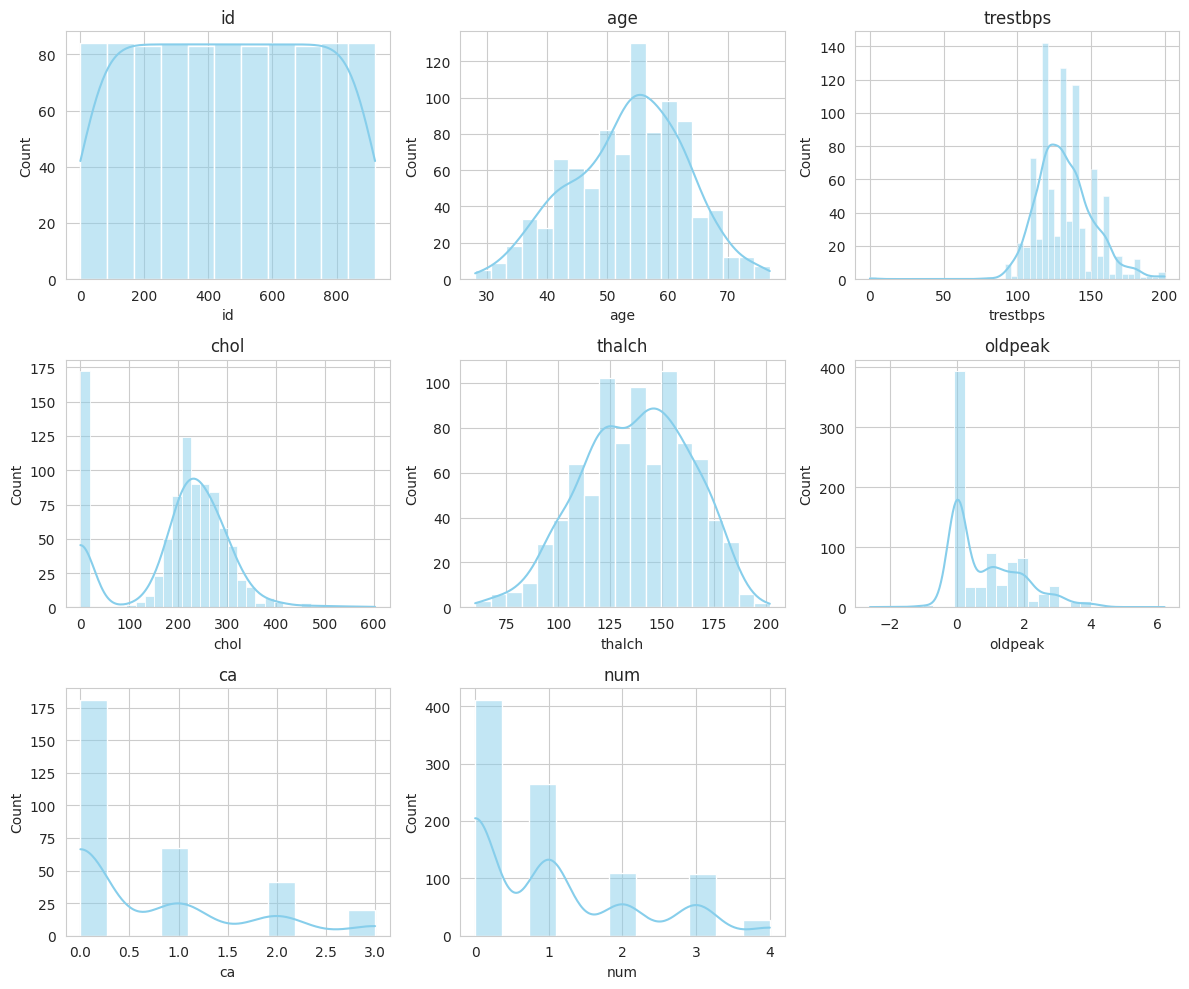

In [3]:
numerical_vars = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

---

## 4. Numerical Features: Binned Distributions
We bin selected continuous features to visualize their relationship with heart disease stages.


/tmp/ipykernel_24252/86888751.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']


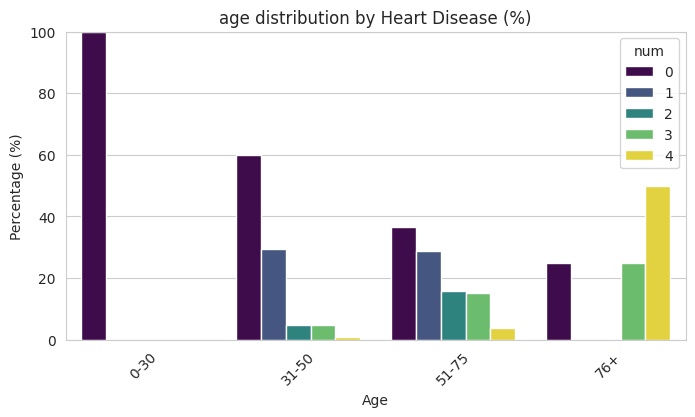

/tmp/ipykernel_24252/86888751.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']


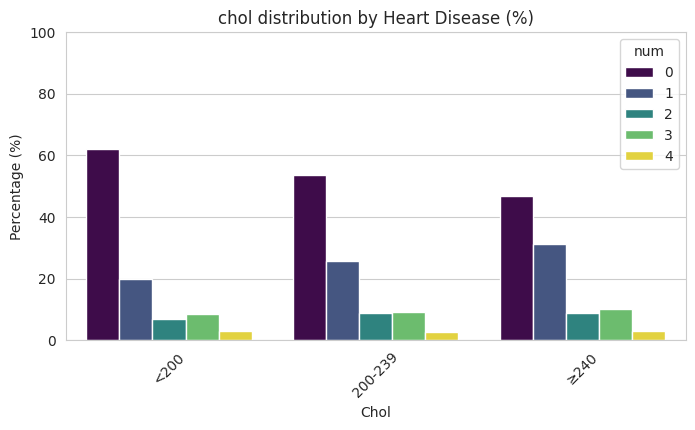

/tmp/ipykernel_24252/86888751.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']


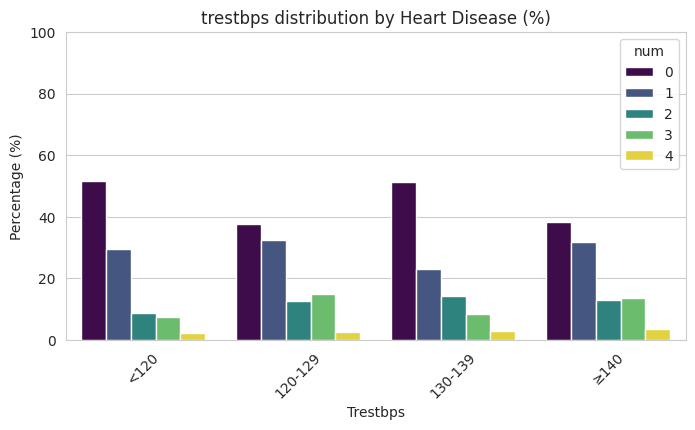

/tmp/ipykernel_24252/86888751.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']


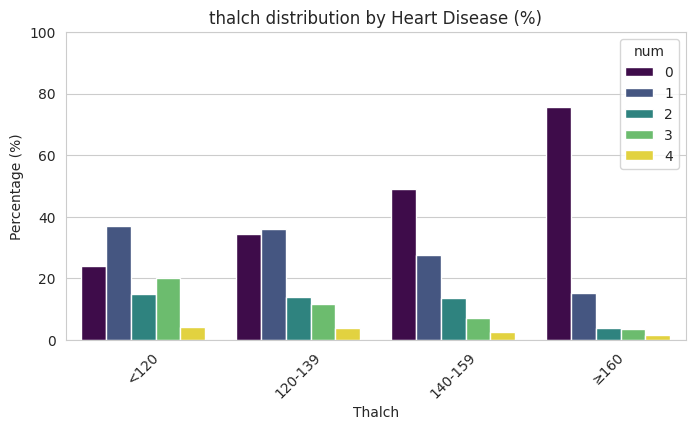

/tmp/ipykernel_24252/86888751.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']


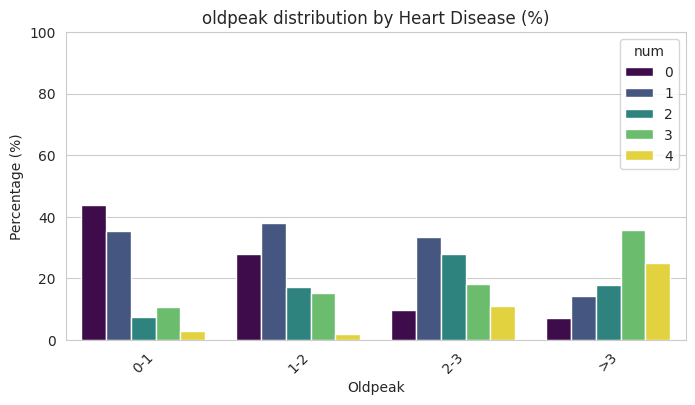

In [4]:
sns.set_style("whitegrid")

bins_dict = {
    "age": [0, 30, 50, 75, 100],
    "chol": [0, 200, 239, 1000],  
    "trestbps": [0, 120, 129, 139, 200],  
    "thalch": [0, 120, 139, 159, 220],
    "oldpeak": [0, 1, 2, 3, 10]
}

labels_dict = {
    "age": ["0-30", "31-50", "51-75", "76+"],
    "chol": ["<200", "200-239", "≥240"],
    "trestbps": ["<120","120-129","130-139","≥140"],
    "thalch": ["<120","120-139","140-159","≥160"],
    "oldpeak": ["0-1","1-2","2-3",">3"]
}

for col in bins_dict.keys():
    df[f"{col}_bin"] = pd.cut(df[col], bins=bins_dict[col], labels=labels_dict[col])
    
    plt.figure(figsize=(8,4))
    cat_percentages = (
        df.groupby(f"{col}_bin")['num']
        .value_counts(normalize=True)
        .mul(100)
        .rename("percentage")
        .reset_index()
    )
    sns.barplot(
        data=cat_percentages,
        x=f"{col}_bin", y="percentage",
        hue="num",
        palette=sns.color_palette("viridis", as_cmap=True),
        order=labels_dict[col]
    )
    plt.title(f"{col} distribution by Heart Disease (%)")
    plt.ylabel("Percentage (%)")
    plt.xlabel(col.capitalize())
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.show()

---

## 5. Categorical Variables Overview
We first check unique categories and their frequencies.

In [5]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()

for col in categorical_vars:
    print(f"--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(5))
    print("\n")

--- sex ---
Unique values: 2
sex
Male      726
Female    194
Name: count, dtype: int64


--- dataset ---
Unique values: 4
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


--- cp ---
Unique values: 4
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


--- fbs ---
Unique values: 2
fbs
False    692
True     138
Name: count, dtype: int64


--- restecg ---
Unique values: 3
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


--- exang ---
Unique values: 2
exang
False    528
True     337
Name: count, dtype: int64


--- slope ---
Unique values: 3
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


--- thal ---
Unique values: 3
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64




In [22]:
# %% [markdown]
# ## Summary Statistics for Numerical Variables
# This section provides a quick overview of the numerical features in the dataset.
# We report:
# - **Count**: Non-null entries.
# - **Mean/Median**: Central tendency.
# - **Std**: Spread of values.
# - **Min/Max**: Range.
# - **Unique**: Number of unique values (useful for detecting discrete-like variables).
#
# This helps us spot unrealistic values, outliers, and general feature distributions.

numeric_vars = df.select_dtypes(include='number').columns.tolist()

for col in numeric_vars:
    print(f"--- {col} ---")
    print(f"Count: {df[col].count()}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Q1: {df[col].quantile(0.25)}")
    print(f"Q3: {df[col].quantile(0.75)}")
    print("\n")

--- id ---
Count: 920
Unique values: 920
Mean: 460.50
Median: 460.50
Std: 265.73
Min: 1
Max: 920
Q1: 230.75
Q3: 690.25


--- age ---
Count: 920
Unique values: 50
Mean: 53.51
Median: 54.00
Std: 9.42
Min: 28
Max: 77
Q1: 47.0
Q3: 60.0


--- trestbps ---
Count: 861
Unique values: 61
Mean: 132.13
Median: 130.00
Std: 19.07
Min: 0.0
Max: 200.0
Q1: 120.0
Q3: 140.0


--- chol ---
Count: 890
Unique values: 217
Mean: 199.13
Median: 223.00
Std: 110.78
Min: 0.0
Max: 603.0
Q1: 175.0
Q3: 268.0


--- thalch ---
Count: 865
Unique values: 119
Mean: 137.55
Median: 140.00
Std: 25.93
Min: 60.0
Max: 202.0
Q1: 120.0
Q3: 157.0


--- oldpeak ---
Count: 858
Unique values: 53
Mean: 0.88
Median: 0.50
Std: 1.09
Min: -2.6
Max: 6.2
Q1: 0.0
Q3: 1.5


--- ca ---
Count: 309
Unique values: 4
Mean: 0.68
Median: 0.00
Std: 0.94
Min: 0.0
Max: 3.0
Q1: 0.0
Q3: 1.0


--- num ---
Count: 920
Unique values: 5
Mean: 1.00
Median: 1.00
Std: 1.14
Min: 0
Max: 4
Q1: 0.0
Q3: 2.0




Check how many zeros exist for these columns

In [23]:
for col in ['trestbps', 'chol', 'ca']:
    print(f"{col} - number of 0s: {(df[col]==0).sum()} out of {len(df)}")

trestbps - number of 0s: 1 out of 920
chol - number of 0s: 172 out of 920
ca - number of 0s: 181 out of 920


---

## 6. Categorical Features by Target
Percentages of each target category within each categorical variable group.

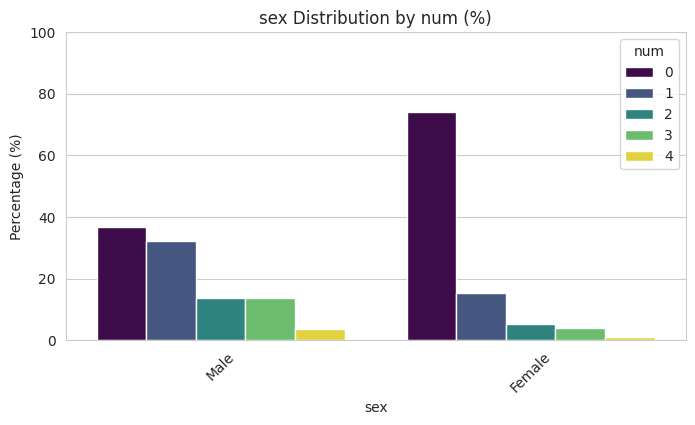

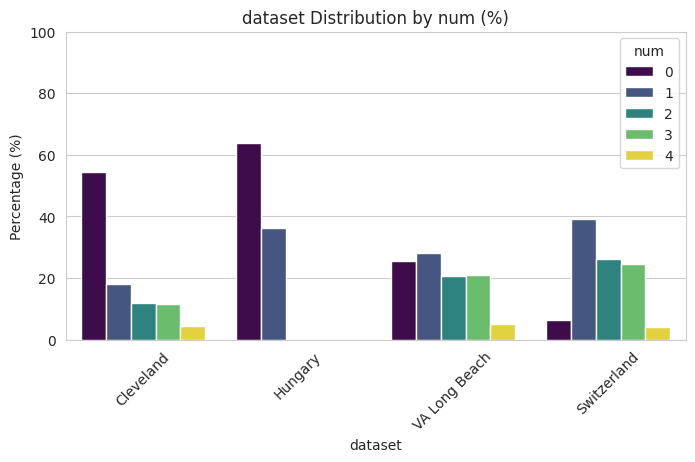

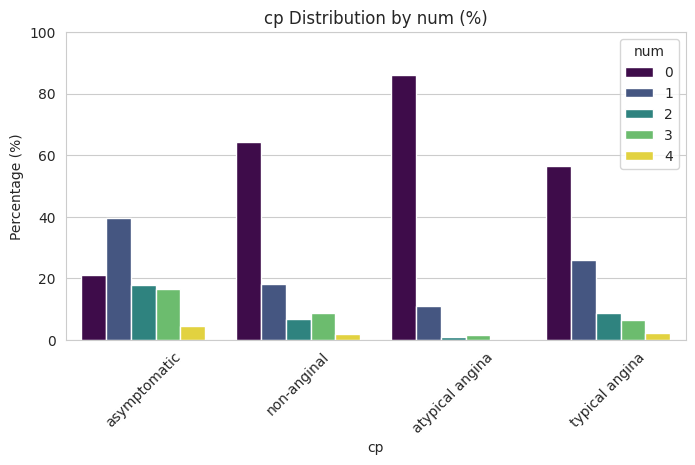

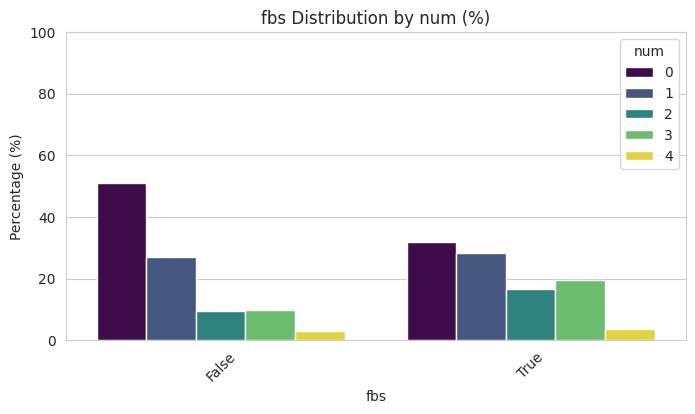

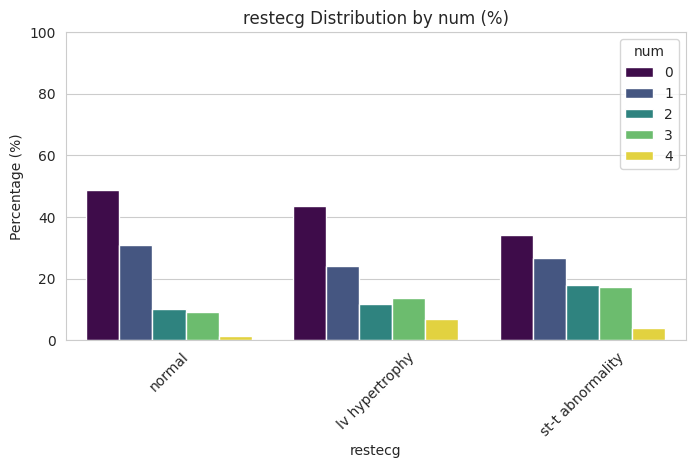

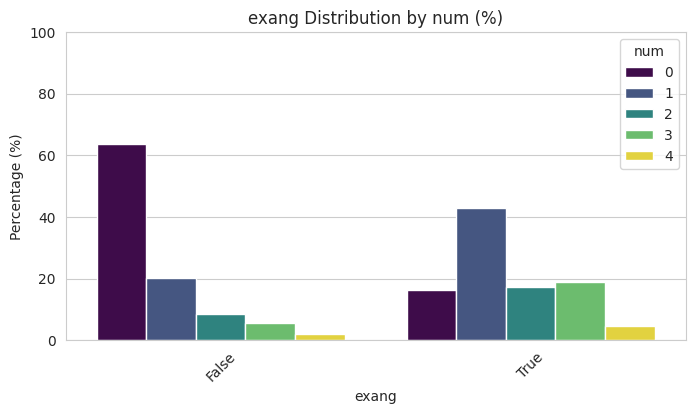

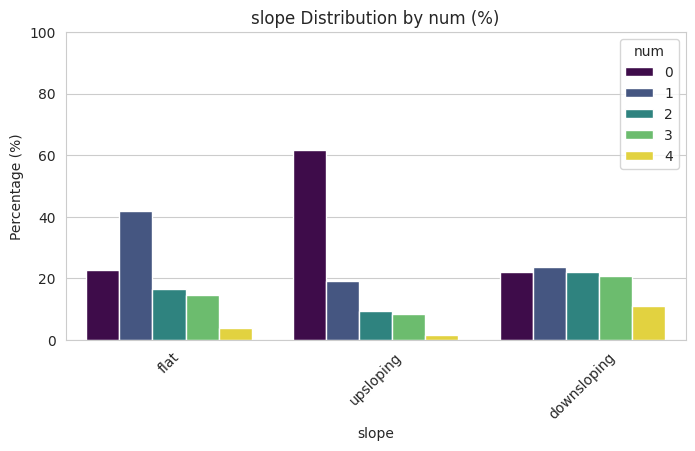

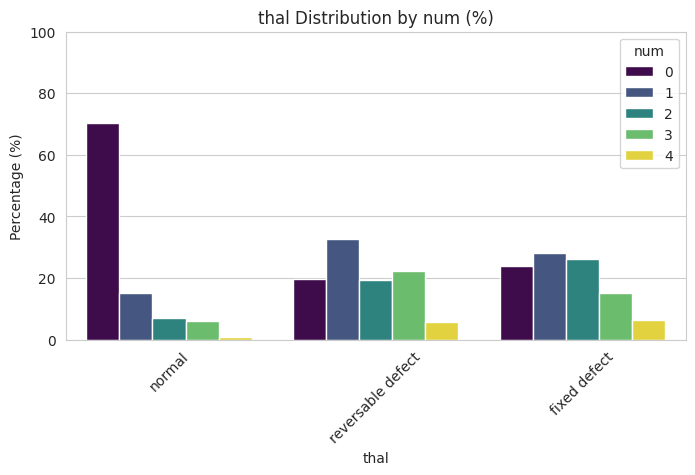

In [6]:
def plot_categorical_percent(df, col, target="num"):
    plt.figure(figsize=(8,4))
    cat_percentages = (
        df.groupby(col)[target]
        .value_counts(normalize=True)
        .mul(100)
        .rename("percentage")
        .reset_index()
    )
    sns.barplot(
        data=cat_percentages,
        x=col, y="percentage",
        hue=target,
        palette=sns.color_palette("viridis", as_cmap=True),
        order=df[col].value_counts().index
    )
    plt.xticks(rotation=45)
    plt.ylabel("Percentage (%)")
    plt.title(f"{col} Distribution by {target} (%)")
    plt.ylim(0, 100)
    plt.show()

for col in categorical_vars:
    if df[col].nunique() <= 15:
        plot_categorical_percent(df, col)

---

## 7. Correlation Analysis
We compute Spearman and Pearson correlations with the target `num` to identify top predictive features.


In [7]:
numeric_cols = df.select_dtypes(include='number')
corr_spearman = numeric_cols.corr(method='spearman')['num'].sort_values(key=abs, ascending=False)[1:]
print("Top correlations with target (Spearman):")
display(corr_spearman.head(10))

corr_pearson = numeric_cols.corr(method='pearson')['num'].sort_values(key=abs, ascending=False)[1:]
print("Top correlations with target (Pearson):")
display(corr_pearson.head(10))

Top correlations with target (Spearman):


ca          0.528047
oldpeak     0.434273
thalch     -0.398360
age         0.347184
id          0.325659
chol       -0.157563
trestbps    0.126805
Name: num, dtype: float64

Top correlations with target (Pearson):


ca          0.516216
oldpeak     0.443084
thalch     -0.366265
age         0.339596
id          0.273552
chol       -0.231547
trestbps    0.122291
Name: num, dtype: float64

In [15]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select categorical columns (excluding numeric ones)
cat_cols = df.select_dtypes(exclude='number').columns.tolist()

# If some categorical columns are stored as int but represent categories, cast them
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 10 and col != 'num':
        cat_cols.append(col)

cat_cols = list(set(cat_cols))  # remove duplicates

# Calculate Cramér’s V with target
target_col = 'num_bin' if 'num_bin' in df.columns else 'num'
cat_assoc = {}

for col in cat_cols:
    confusion_mat = pd.crosstab(df[col], df[target_col])
    cat_assoc[col] = cramers_v(confusion_mat)

cat_assoc_df = pd.DataFrame.from_dict(cat_assoc, orient='index', columns=['Cramers_V'])
cat_assoc_df = cat_assoc_df.sort_values(by='Cramers_V', ascending=False)

print("Categorical features ranked by association with target:")
display(cat_assoc_df)

Categorical features ranked by association with target:


,Cramers_V
exang,0.463451
thal,0.350370
ca,0.330418
cp,0.307443
sex,0.301836
dataset,0.298420
slope,0.280915
oldpeak_bin,0.233431
thalch_bin,0.225219
age_bin,0.187287


---

## 8. Candidate Features for Modeling
We select top features from both correlation methods.

In [16]:
# --- Numeric features shortlist (already from your code) ---
num_top = list(set(
    corr_spearman.head(5).index.to_list() +
    corr_pearson.head(5).index.to_list()
))

# --- Categorical features shortlist ---
# Keep only top N categorical vars by Cramér’s V (e.g., top 5)
cat_top = cat_assoc_df.head(5).index.to_list()

# --- Combine both ---
top_features = list(set(num_top + cat_top))

print("Candidate features for modeling (numeric + categorical):")
print(top_features)

Candidate features for modeling (numeric + categorical):
['sex', 'age', 'thal', 'thalch', 'oldpeak', 'exang', 'cp', 'id', 'ca']


---

## 9. Correlation Heatmaps
Heatmap for key features and target variable.

NOTE: This is computed across the entire dataset — not by class.

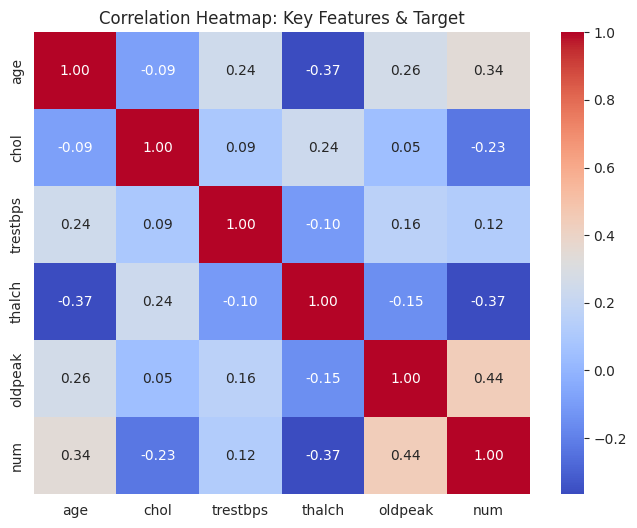

In [ ]:
key_features = ['age', 'chol', 'trestbps', 'thalch', 'oldpeak', 'num']

plt.figure(figsize=(8,6))
sns.heatmap(df[key_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Key Features & Target")
plt.s

---

## 10. Pairplot with Gender as Hue
This allows us to visually inspect possible gender differences in key feature distributions.


/tmp/ipykernel_24252/3516614038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_24252/3516614038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_24252/3516614038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


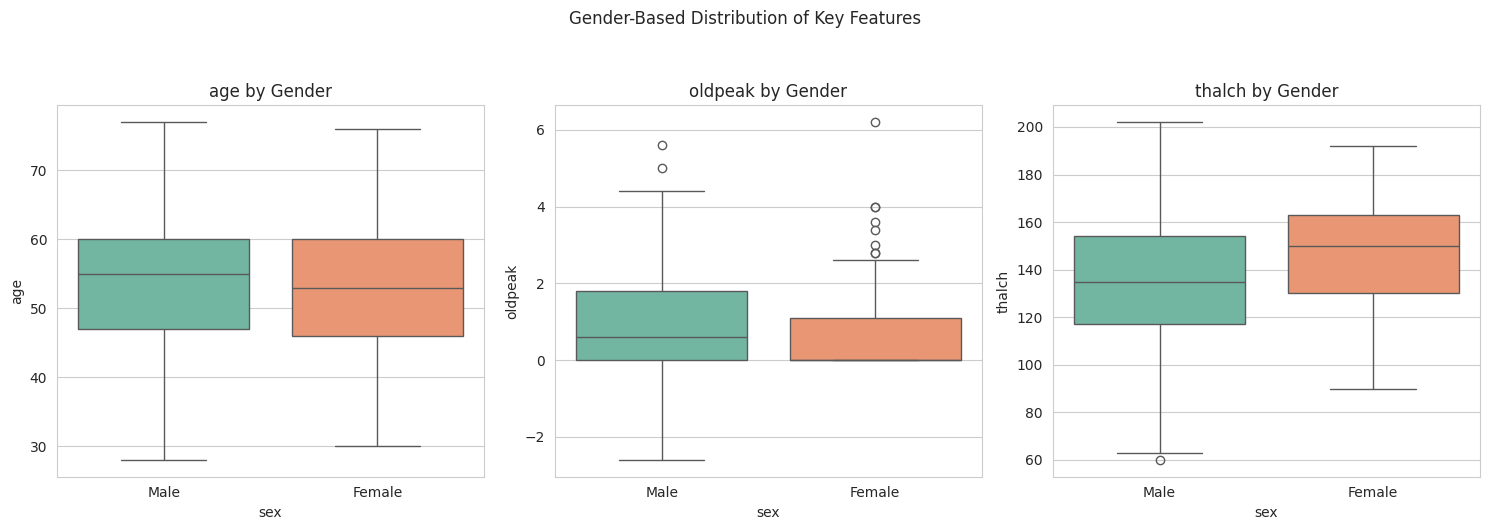

In [19]:
gender_features = ['age', 'oldpeak', 'thalch']

fig, axes = plt.subplots(1, len(gender_features), figsize=(15, 5))

for i, feature in enumerate(gender_features):
    sns.boxplot(
        x='sex', y=feature, data=df,
        palette='Set2', ax=axes[i]
    )
    axes[i].set_title(f"{feature} by Gender")

plt.suptitle("Gender-Based Distribution of Key Features", y=1.05)
plt.tight_layout()
plt.show()

---

## 11. Spearman Correlation by Class
We compute correlations within each class separately for a more granular view.

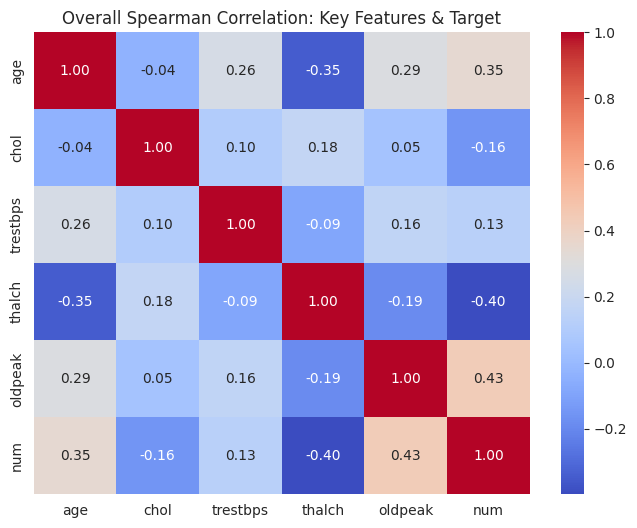

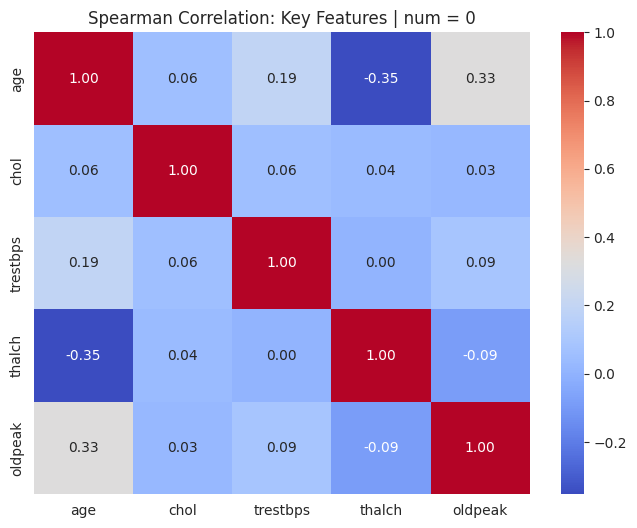

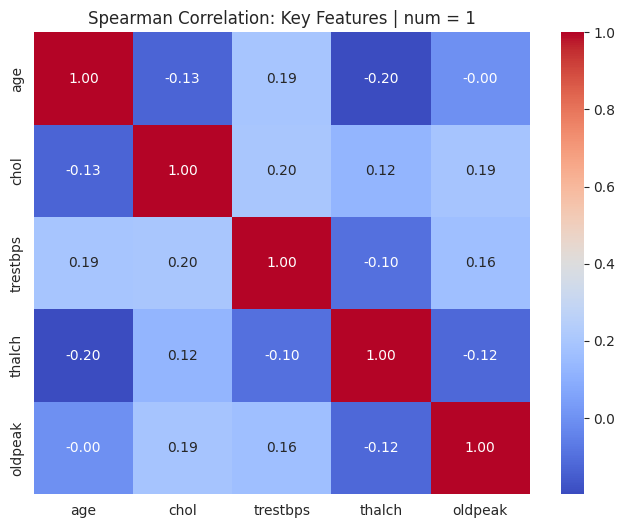

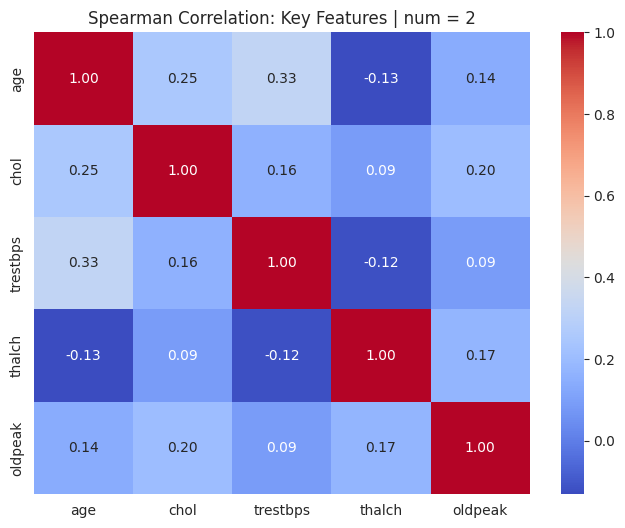

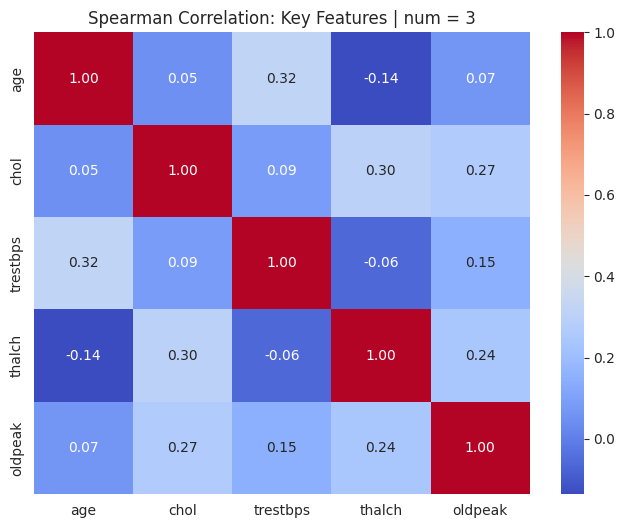

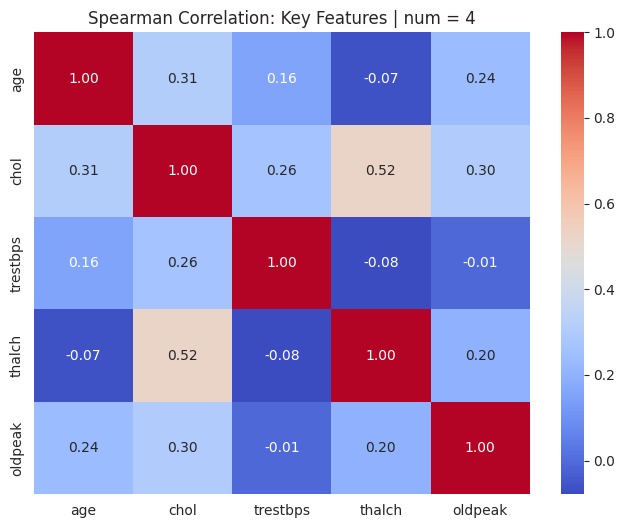

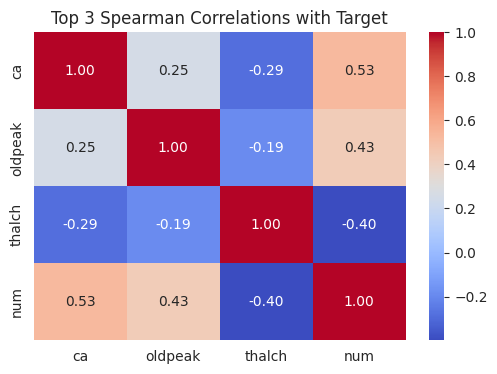

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[key_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Overall Spearman Correlation: Key Features & Target")
plt.show()

for label in sorted(df['num'].unique()):
    subset = df[df['num'] == label][key_features[:-1]]
    plt.figure(figsize=(8,6))
    sns.heatmap(subset.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Spearman Correlation: Key Features | num = {label}")
    plt.show()

numeric_cols = df.select_dtypes(include='number')
corr_spearman = numeric_cols.corr(method='spearman')['num'].drop('num').sort_values(key=abs, ascending=False)
top_features = corr_spearman.head(3).index.tolist()

plt.figure(figsize=(6,4))
sns.heatmap(df[top_features + ['num']].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 3 Spearman Correlations with Target")
plt.show()

## 12. Save Cleaned Dataset and Figures
We save the inspected dataset and all key figures to the `outputs` folder.

In [27]:
import os

# Create folders if they don't exist
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/datasets/collection", exist_ok=True)

# --- Replace impossible zeros with NaN for numeric columns ---
for col in ['trestbps', 'chol']:
    df[col] = df[col].replace(0, pd.NA)

# Save the cleaned dataset
df.to_csv("outputs/datasets/collection/heart_disease_inspected.csv", index=False)
print("Cleaned dataset saved: outputs/datasets/collection/heart_disease_inspected.csv")

# --- Function to save figures ---
def save_figure(fig, filename):
    fig.savefig(f"outputs/figures/{filename}", bbox_inches="tight")
    plt.close(fig)  # Close to avoid overlapping plots

# --- Target variable distribution ---
fig = plt.figure(figsize=(6,4))
sns.barplot(x=target_labels, y=target_percent.values, color="skyblue")
plt.title("Target Variable Distribution: Heart Disease (num)")
plt.xlabel("Heart Disease (0= Absence; 1-4 = stages)")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
for i, pct in enumerate(target_percent.values):
    plt.text(i, pct + 1, f'{pct:.1f}%', ha='center')
save_figure(fig, "target_distribution.png")

# --- Numerical features histograms ---
fig = plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(col)
plt.tight_layout()
save_figure(fig, "numerical_features_hist.png")

# --- Binned numerical feature distributions ---
for col in bins_dict.keys():
    fig = plt.figure(figsize=(8,4))
    cat_percentages = (
        df.groupby(f"{col}_bin")['num']
        .value_counts(normalize=True)
        .mul(100)
        .rename("percentage")
        .reset_index()
    )
    sns.barplot(
        data=cat_percentages,
        x=f"{col}_bin", y="percentage",
        hue="num",
        palette=sns.color_palette("viridis", as_cmap=True),
        order=labels_dict[col]
    )
    plt.title(f"{col} distribution by Heart Disease (%)")
    plt.ylabel("Percentage (%)")
    plt.xlabel(col.capitalize())
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    save_figure(fig, f"{col}_binned_distribution.png")

# --- Categorical features by target ---
for col in categorical_vars:
    if df[col].nunique() <= 15:
        fig = plt.figure(figsize=(8,4))
        cat_percentages = (
            df.groupby(col)['num']
            .value_counts(normalize=True)
            .mul(100)
            .rename("percentage")
            .reset_index()
        )
        sns.barplot(
            data=cat_percentages,
            x=col, y="percentage",
            hue="num",
            palette=sns.color_palette("viridis", as_cmap=True),
            order=df[col].value_counts().index
        )
        plt.xticks(rotation=45)
        plt.ylabel("Percentage (%)")
        plt.title(f"{col} Distribution by num (%)")
        plt.ylim(0, 100)
        save_figure(fig, f"{col}_categorical_distribution.png")

# --- Spearman correlation heatmap ---
fig = plt.figure(figsize=(8,6))
sns.heatmap(df[key_features].dropna().corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Overall Spearman Correlation: Key Features & Target")
save_figure(fig, "spearman_correlation_heatmap.png")

# --- Top 3 Spearman correlations ---
fig = plt.figure(figsize=(6,4))
numeric_top_features = [col for col in top_features if pd.api.types.is_numeric_dtype(df[col])]
sns.heatmap(df[numeric_top_features + ['num']].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 3 Spearman Correlations with Target")
save_figure(fig, "top3_spearman_correlation.png")

# --- Gender-based boxplots ---
fig, axes = plt.subplots(1, len(gender_features), figsize=(15, 5))
for i, feature in enumerate(gender_features):
    sns.boxplot(
        x='sex', y=feature, data=df,
        palette='Set2', ax=axes[i]
    )
    axes[i].set_title(f"{feature} by Gender")
plt.suptitle("Gender-Based Distribution of Key Features", y=1.05)
plt.tight_layout()
save_figure(fig, "gender_based_boxplots.png")

print("All figures saved in outputs/figures/")

Cleaned dataset saved: outputs/datasets/collection/heart_disease_inspected.csv


/tmp/ipykernel_24252/3186600621.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']
/tmp/ipykernel_24252/3186600621.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']
/tmp/ipykernel_24252/3186600621.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{col}_bin")['num']
/tmp/ipykernel_24252/3186600621.py:44: FutureWarning: The default of obse

All figures saved in outputs/figures/
